In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

In [2]:
def hybridImages(image1, image2, alpha, beta):
    def highpass(values, alpha):
        (M, N) = (values.shape[0], values.shape[1])
        for i in range(M):
            for j in range(N):
                if(np.linalg.norm((i, j)) < alpha):
                    values[i, j] = 0
        return values
    def lowpass(values, beta):
        (M, N) = (values.shape[0], values.shape[1])
        for i in range(M):
            for j in range(N):
                if(np.linalg.norm((i, j)) > beta):
                    values[i, j] = 0
        return values
    image1 = np.array(mpimg.imread(image1))
    image2 = np.array(mpimg.imread(image2))
    if(image1.shape != image2.shape):
        if(image1.shape > image2.shape):
            image1 = image1[:image2.shape[0], :image2.shape[1]]
        else:
            image2 = image2[:image1.shape[0], :image1.shape[1]]
    red1 = image1[:, :, 0]
    green1 = image1[:, :, 1]
    blue1 = image1[:, :, 2]
    red2 = image2[:, :, 0]
    green2 = image2[:, :, 1]
    blue2 = image2[:, :, 2]
    plt.figure();
    plt.imshow(image1)
    plt.show();
    plt.figure();
    plt.imshow(image2);
    plt.show();
    freq_image1_red = np.fft.fft2(red1)
    freq_image1_green = np.fft.fft2(green1)
    freq_image1_blue = np.fft.fft2(blue1)
    freq_image2_red = np.fft.fft2(red2)
    freq_image2_green = np.fft.fft2(green2)
    freq_image2_blue = np.fft.fft2(blue2)
    freq_image1_red = highpass(freq_image1_red, alpha)
    freq_image1_green = highpass(freq_image1_green, alpha)
    freq_image1_blue = highpass(freq_image1_blue, alpha)
    freq_image2_red = lowpass(freq_image2_red, beta)
    freq_image2_green = lowpass(freq_image2_green, beta)
    freq_image2_blue = lowpass(freq_image2_blue, beta)
    final_image_red = freq_image1_red + freq_image2_red
    final_image_green = freq_image1_green + freq_image2_green
    final_image_blue = freq_image1_blue + freq_image2_blue
    final_image_red = np.fft.ifft2(final_image_red)
    final_image_blue = np.fft.ifft2(final_image_blue)
    final_image_green = np.fft.ifft2(final_image_green)
    final_image = np.zeros(image1.shape)
    final_image[:,:,0] = np.absolute(final_image_red)
    final_image[:,:,1] = np.absolute(final_image_green)
    final_image[:,:,2] = np.absolute(final_image_blue)
    return np.absolute(final_image)/np.max(np.absolute(final_image))


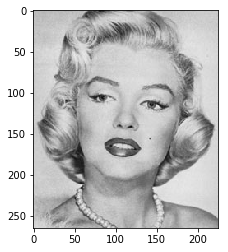

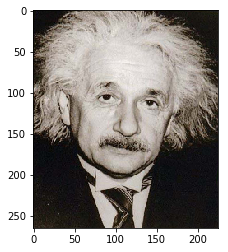

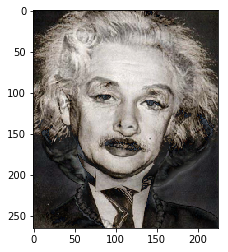

In [3]:
plt.imshow(hybridImages("marilyn.bmp", "einstein.bmp", 25, 1000))
plt.show()

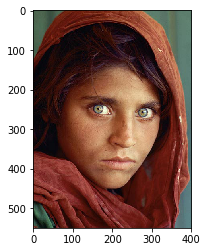

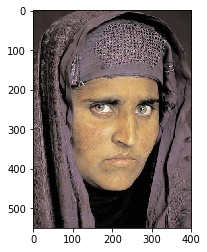

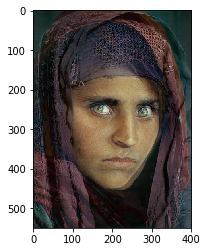

In [4]:
plt.imshow(hybridImages("Afghan_girl_before.jpg", "Afghan_girl_after.jpg", 25, 750))
plt.show()

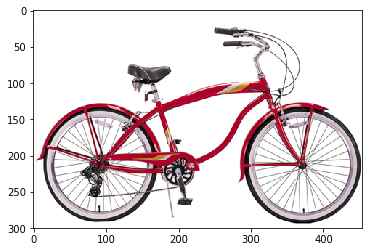

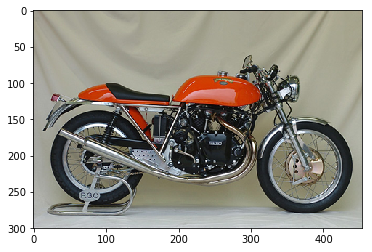

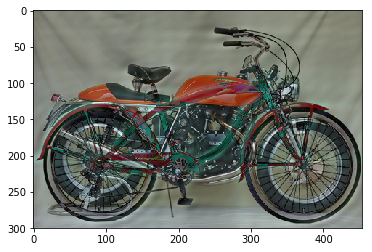

In [5]:
plt.imshow(hybridImages("bicycle.bmp", "motorcycle.bmp", 25, 750))
plt.show()

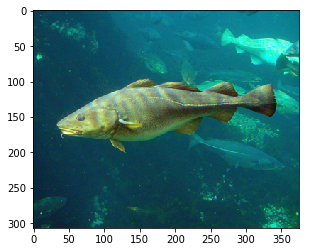

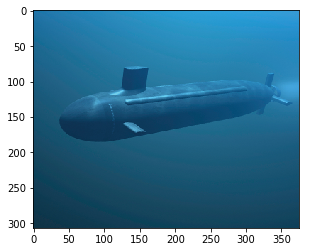

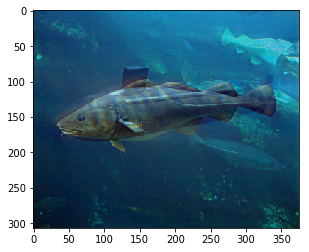

In [6]:
plt.imshow(hybridImages("fish.bmp", "submarine.bmp", 25, 750))
plt.show()

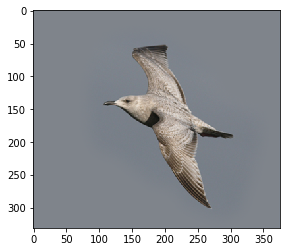

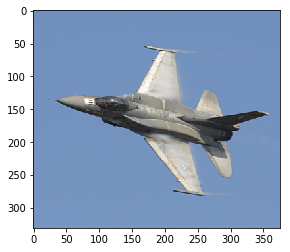

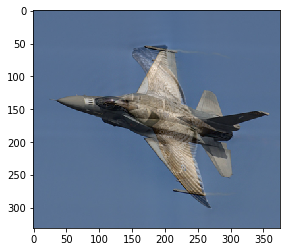

In [7]:
plt.imshow(hybridImages("bird.bmp", "plane.bmp", 25, 750))
plt.show()

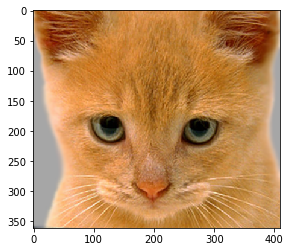

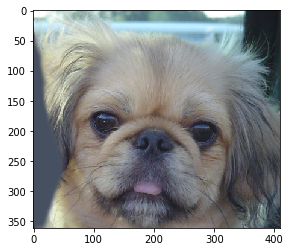

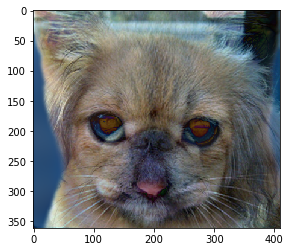

In [8]:
plt.imshow(hybridImages("cat.bmp", "dog.bmp", 5, 750))
plt.show()

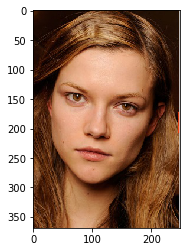

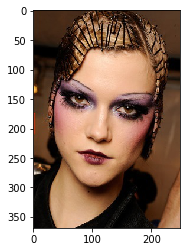

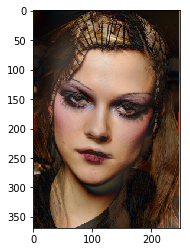

In [9]:
plt.imshow(hybridImages("makeup_before.jpg", "makeup_after.jpg", 5, 750))
plt.show()